<center> <img src ="https://i.postimg.cc/1X8H7YYt/BITS-Logo.png" width = "400" alt="BITS Pilani Logo" /> </center>

# **ANN MODELING**

# **Import the required library for DL**

---

In [57]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader,random_split
import warnings
warnings.filterwarnings("ignore")


import nltk
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics


from nltk.tag import hmm
from nltk.corpus import treebank

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [58]:
#Read the data set
csv_file ="HumanTrafficking_CLEAN_Dataset.csv"
df_dl =pd.read_csv(csv_file,index_col=0)

In [59]:
df_dl.head(5)

,Title,Age,description,websiteRef,Minor,LangPattern,Trafficked
0,call girls in riya 24x7 hot sexy best housewif...,21,hyy guys https wa me i am riya inde...,1,1,1,1
1,no advance out call door step independent cal...,21,no advance direct payment hotel and hom...,1,1,0,0
2,call girls in jp nagar hot sexy independent gi...,21,professional escort services https w...,1,1,1,1
3,sneha independent kannada girl call me,21,sneha hand cash online payments for t...,0,1,0,0
5,call ammu 1500 shot 5500 night call girl avail...,21,get in touch in whatsapp now directly w...,1,1,0,0


In [60]:
df_dl.columns

Index(['Title', 'Age', 'description', 'websiteRef', 'Minor', 'LangPattern',
       'Trafficked'],
      dtype='object')

#Transform Text to Numeric using NLP

In [61]:
X= df_dl['description'].values
y= df_dl['Trafficked'].values


In [62]:
bow_article =  CountVectorizer().fit(X)
countVector = bow_article.get_feature_names_out()
print(countVector)

['aadil' 'aarthireddy' 'able' ... 'yourself' 'yr' 'zoyalana']


In [63]:
article_vec = bow_article.transform(X)
countVectorArray = bow_article.get_feature_names_out()
countVectorArray

array(['aadil', 'aarthireddy', 'able', ..., 'yourself', 'yr', 'zoyalana'],
      dtype=object)

In [64]:
#create dataframe for vocabulary
df_bow=pd.DataFrame(article_vec.toarray(),columns=countVectorArray)
print(df_bow)

     aadil  aarthireddy  able  about  above  ac  acceptance  accomadation  \
0        0            0     0      0      0   0           0             0   
1        0            0     0      0      0   0           0             0   
2        0            0     0      0      0   0           0             0   
3        0            0     0      0      0   0           0             0   
4        0            0     0      0      0   0           0             0   
..     ...          ...   ...    ...    ...  ..         ...           ...   
167      0            0     0      0      0   0           0             0   
168      0            0     0      0      0   0           0             0   
169      0            0     0      2      0   0           0             0   
170      0            3     0      0      0   0           0             0   
171      0            0     0      0      0   0           0             0   

     accommodation  accomodate  ...  yer  yeshwantpur  you  youcall  young 

In [65]:
df_bow['Trafficked']=df_dl['Trafficked']

In [66]:
df_bow.head(5)

,aadil,aarthireddy,able,about,above,ac,acceptance,accomadation,accommodation,accomodate,...,yeshwantpur,you,youcall,young,your,yours,yourself,yr,zoyalana,Trafficked
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,3,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [67]:
df_bow = df_bow.dropna(how='any',axis=0)
df_bow.head(3)

,aadil,aarthireddy,able,about,above,ac,acceptance,accomadation,accommodation,accomodate,...,yeshwantpur,you,youcall,young,your,yours,yourself,yr,zoyalana,Trafficked
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,3,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,1.0


In [68]:
df_bow.to_csv("HumanTrafficking_ANN_Dataset.csv")

# **Data Loading**

---

In [69]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [70]:
df_bow.shape

(146, 1412)

In [71]:
df_X=df_bow.drop(['Trafficked'],axis=1)
df_y=df_bow.iloc[:,-1]

In [72]:
df_y


0      1.0
1      0.0
2      1.0
3      0.0
5      0.0
      ... 
164    0.0
165    0.0
169    1.0
170    1.0
171    0.0
Name: Trafficked, Length: 146, dtype: float64

# CLASS BALANCE

In [73]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(df_X, df_y)

In [74]:
X.shape

(174, 1411)

In [75]:
X

,aadil,aarthireddy,able,about,above,ac,acceptance,accomadation,accommodation,accomodate,...,yer,yeshwantpur,you,youcall,young,your,yours,yourself,yr,zoyalana
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,3,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
import torch.utils.data as data_utils
X = torch.from_numpy(X.to_numpy()).type(torch.float)
y = torch.from_numpy(y.to_numpy()).type(torch.float)

In [77]:

X.shape[0]

174

In [78]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([139, 1411]) torch.Size([35, 1411]) torch.Size([139]) torch.Size([35])


# **Building a model**

# **Model 0**

---

In [79]:
class BiModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=X.shape[1], out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = BiModelV0().to(device)
model_0

BiModelV0(
  (layer_1): Linear(in_features=1411, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

**Prediction WITHOUT Training**

In [80]:
untrained_preds = model_0(X_test.to(device))
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}") #untrained_pred is y_test_cap
print(f"\nFirst 10 test labels:\n{y_test[:10]}")


First 10 predictions:
tensor([[-0.0453],
        [ 0.1007],
        [ 0.0408],
        [ 0.8966],
        [ 0.0448],
        [ 0.0247],
        [-0.0525],
        [ 0.0878],
        [ 0.1907],
        [ 0.0042]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 1., 0., 0., 0., 0., 0., 1., 0., 1.])


In [81]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [82]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [83]:
#Function to plot learning curve
def draw_curve(y_loss_val,y_loss_train,y_acc_val,y_acc_train):
  fig=plt.figure(figsize=(10,5))
  ax0 = fig.add_subplot(121, title="Training and Validation Loss")
  ax1 = fig.add_subplot(122, title="Training and Validation Accuracy")

  ax0.plot(y_loss_val,label="val")
  ax0.plot(y_loss_train,label="train")
  ax0.set_xlabel('Epoch')
  ax0.set_ylabel('Loss')

  ax1.plot(y_acc_val,label="val")
  ax1.plot(y_acc_train,label="train")
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Accuracy')

  plt.legend()
  plt.show()

# Model Training and Validation

In [84]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 50
#initial for Plotting
y_loss_train = []
y_loss_val = []
y_acc_train = []
y_acc_val = []

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy

    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    y_loss_train.append(loss.item())
    y_acc_train.append(acc)


    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        y_loss_val.append(test_loss.item())
        y_acc_val.append(test_acc)


    # Print out what's happening every 10 epochs
    if epoch % 2 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71079, Accuracy: 36.69% | Test loss: 0.64441, Test acc: 68.57%
Epoch: 2 | Loss: 1.00963, Accuracy: 49.64% | Test loss: 0.63338, Test acc: 68.57%
Epoch: 4 | Loss: 0.74133, Accuracy: 44.60% | Test loss: 0.63163, Test acc: 68.57%
Epoch: 6 | Loss: 0.70202, Accuracy: 43.88% | Test loss: 1.04919, Test acc: 31.43%
Epoch: 8 | Loss: 1.15354, Accuracy: 48.92% | Test loss: 0.78468, Test acc: 25.71%
Epoch: 10 | Loss: 1.24578, Accuracy: 48.92% | Test loss: 0.68540, Test acc: 40.00%
Epoch: 12 | Loss: 1.09485, Accuracy: 54.68% | Test loss: 0.65480, Test acc: 71.43%
Epoch: 14 | Loss: 0.86086, Accuracy: 51.08% | Test loss: 0.64412, Test acc: 68.57%
Epoch: 16 | Loss: 0.69157, Accuracy: 46.76% | Test loss: 0.67303, Test acc: 48.57%
Epoch: 18 | Loss: 1.07327, Accuracy: 56.12% | Test loss: 0.65886, Test acc: 62.86%
Epoch: 20 | Loss: 0.86703, Accuracy: 52.52% | Test loss: 0.64876, Test acc: 65.71%
Epoch: 22 | Loss: 0.70276, Accuracy: 53.24% | Test loss: 0.65560, Test acc: 71.43%
Epoch: 24

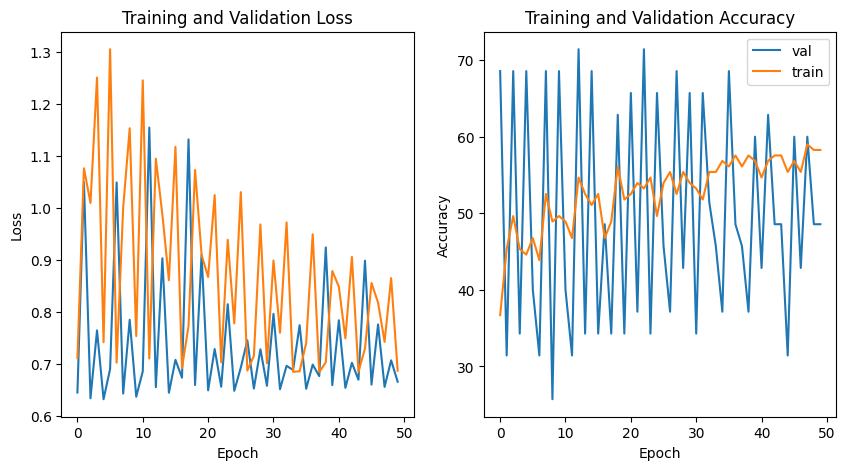

In [85]:
draw_curve(y_loss_val,y_loss_train,y_acc_val,y_acc_train)

In [86]:
model_0.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_0(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 1., 0., 0., 0., 0., 1., 1., 1., 1.]),
 tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]))

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Confusion Matrix: Test Data")
conf_matrix=metrics.confusion_matrix(y_test, y_preds)
print(metrics.confusion_matrix(y_test, y_preds))

Confusion Matrix: Test Data
[[11 12]
 [ 6  6]]


In [88]:
#classification report -
print("Classification Report:")
print(metrics.classification_report(y_test, y_preds, target_names=['0', '1']))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.48      0.55        23
           1       0.33      0.50      0.40        12

    accuracy                           0.49        35
   macro avg       0.49      0.49      0.48        35
weighted avg       0.54      0.49      0.50        35



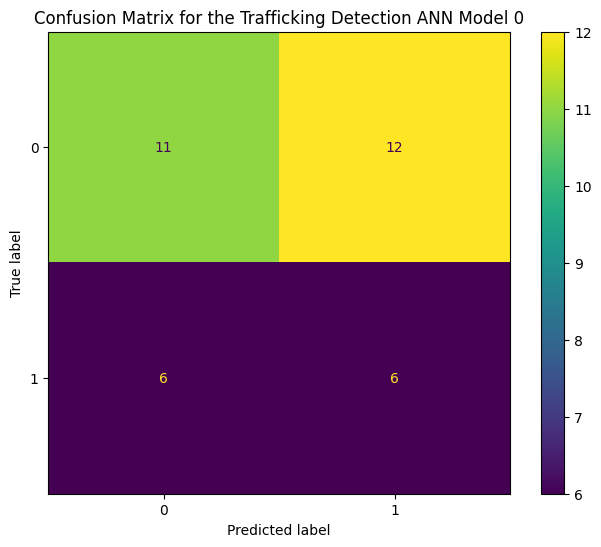

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Trafficking Detection ANN Model 0')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

# **Improve the Model**

---


# **Model 1**:Increase the Layers

---


In [90]:
class BiModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=X.shape[1], out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=5) # extra 1 layer
        self.layer_3 = nn.Linear(in_features=5, out_features=5)# extra 2  layer
        self.layer_4 = nn.Linear(in_features=5, out_features=1)


    def forward(self, x):
      return self.layer_4((self.layer_2(self.layer_1(x))))

model_1 = BiModelV1().to(device)
model_1

BiModelV1(
  (layer_1): Linear(in_features=1411, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=5, bias=True)
  (layer_4): Linear(in_features=5, out_features=1, bias=True)
)

In [91]:
torch.manual_seed(42)

epochs = 50 # Train

#initial for Plotting
y_loss_train = []
y_loss_val = []
y_acc_train = []
y_acc_val = []

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    # Capture for Plotting
    y_loss_train.append(loss.item())
    y_acc_train.append(acc)
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss_1 = loss_fn(test_logits,
                            y_test)
        test_acc_1 = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        ### Test Acccuracy
        y_loss_val.append(test_loss_1.item())
        y_acc_val.append(test_acc_1)
    # Print out what's happening every 10 epochs
    if epoch % 2 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss_1:.5f}, Test acc: {test_acc_1:.2f}%")

Epoch: 0 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 2 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 4 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 6 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 8 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 10 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 12 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 14 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 16 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 18 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 20 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 22 | Loss: 0.75312, Accuracy: 46.04% | Test loss: 0.65517, Test acc: 62.86%
Epoch: 24

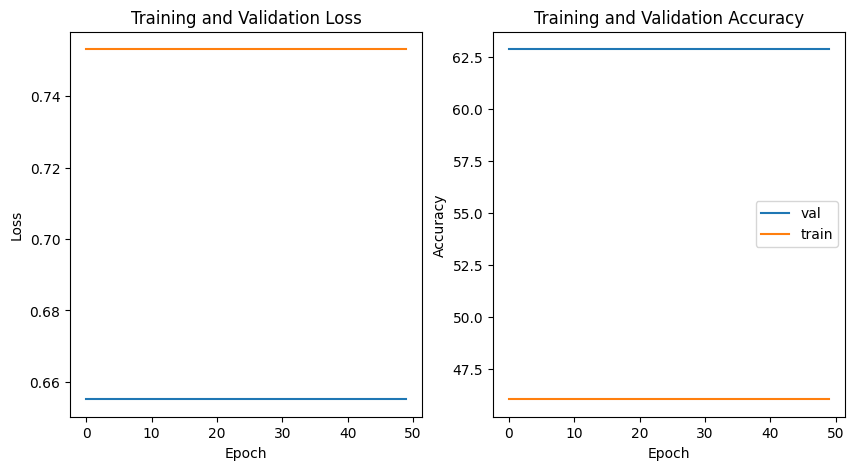

In [92]:
draw_curve(y_loss_val,y_loss_train,y_acc_val,y_acc_train)

# Model Evaluation

---



In [93]:
# Make predictions
model_1.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()
y_preds[:15], y[:15] # want preds in same format as truth labels

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]))

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Confusion Matrix: Test Data")
conf_matrix=metrics.confusion_matrix(y_test, y_preds)
print(metrics.confusion_matrix(y_test, y_preds))

Confusion Matrix: Test Data
[[22  1]
 [12  0]]


In [95]:
#classification report -
print("Classification Report:")
print(metrics.classification_report(y_test, y_preds, target_names=['0', '1']))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.96      0.77        23
           1       0.00      0.00      0.00        12

    accuracy                           0.63        35
   macro avg       0.32      0.48      0.39        35
weighted avg       0.43      0.63      0.51        35



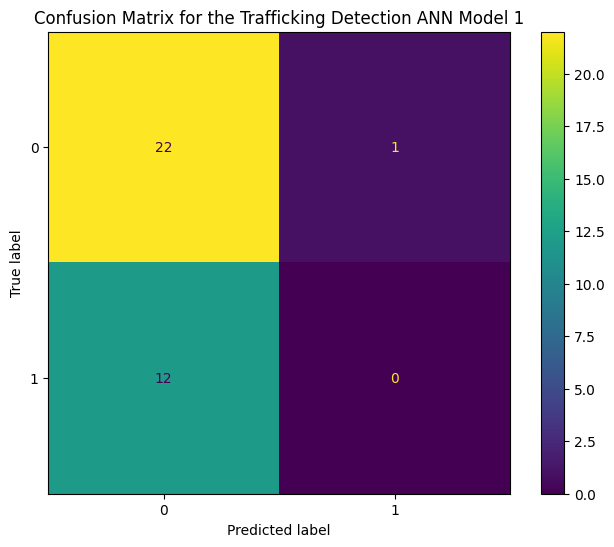

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Trafficking Detection ANN Model 1')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

# **Model 2** :Add Layers and **Sigmoid** Activation Function

---


In [97]:
model_2 = model_2 = nn.Sequential(
    nn.Linear(in_features=X.shape[1], out_features=10),
    nn.Linear(in_features=10, out_features=20) ,
    nn.Linear(in_features=20, out_features=1),
    nn.Sigmoid(),
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1411, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=20, bias=True)
  (2): Linear(in_features=20, out_features=1, bias=True)
  (3): Sigmoid()
)

In [98]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.2)

# Model Training and Validation

---



In [99]:
torch.manual_seed(42)

epochs = 50 # Train


#initial for Plotting
y_loss_train = []
y_loss_val = []
y_acc_train = []
y_acc_val = []

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    # Capture for Plotting
    y_loss_train.append(loss.item())
    y_acc_train.append(acc)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing?validation
    model_2.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss_2 = loss_fn(test_logits,
                            y_test)
        test_acc_2 = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        ### Test Acccuracy
        y_loss_val.append(test_loss_2.item())
        y_acc_val.append(test_acc_2)
    # Print out what's happening every 10 epochs
    if epoch % 2 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss_2:.5f}, Test acc: {test_acc_2:.2f}%")

Epoch: 0 | Loss: 0.70296, Accuracy: 53.96% | Test loss: 0.76683, Test acc: 37.14%
Epoch: 2 | Loss: 0.69483, Accuracy: 54.68% | Test loss: 0.75812, Test acc: 37.14%
Epoch: 4 | Loss: 0.69260, Accuracy: 54.68% | Test loss: 0.75071, Test acc: 37.14%
Epoch: 6 | Loss: 0.69066, Accuracy: 54.68% | Test loss: 0.74436, Test acc: 37.14%
Epoch: 8 | Loss: 0.68896, Accuracy: 54.68% | Test loss: 0.73888, Test acc: 37.14%
Epoch: 10 | Loss: 0.68743, Accuracy: 54.68% | Test loss: 0.73413, Test acc: 37.14%
Epoch: 12 | Loss: 0.68606, Accuracy: 54.68% | Test loss: 0.72999, Test acc: 37.14%
Epoch: 14 | Loss: 0.68481, Accuracy: 54.68% | Test loss: 0.72636, Test acc: 37.14%
Epoch: 16 | Loss: 0.68366, Accuracy: 54.68% | Test loss: 0.72318, Test acc: 37.14%
Epoch: 18 | Loss: 0.68260, Accuracy: 54.68% | Test loss: 0.72038, Test acc: 37.14%
Epoch: 20 | Loss: 0.68160, Accuracy: 54.68% | Test loss: 0.71792, Test acc: 37.14%
Epoch: 22 | Loss: 0.68067, Accuracy: 54.68% | Test loss: 0.71576, Test acc: 37.14%
Epoch: 24

# Plotting Learning Curves

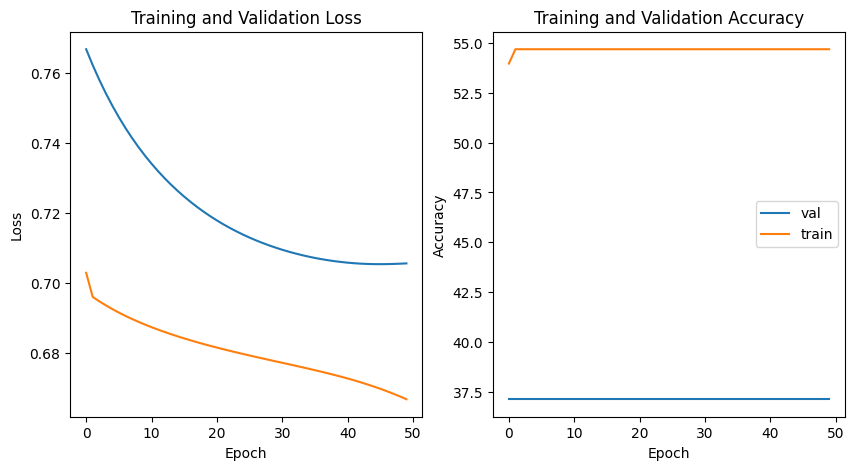

In [100]:
draw_curve(y_loss_val,y_loss_train,y_acc_val,y_acc_train)

In [101]:
# Make predictions
model_2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()
y_preds[:15], y[:15] # want preds in same format as truth labels

(tensor([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]))

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Confusion Matrix: Test Data")
conf_matrix=metrics.confusion_matrix(y_test, y_preds)
print(metrics.confusion_matrix(y_test, y_preds))

Confusion Matrix: Test Data
[[ 1 22]
 [ 0 12]]


In [103]:
#classification report -
print("Classification Report:")
print(metrics.classification_report(y_test, y_preds, target_names=['0', '1']))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        23
           1       0.35      1.00      0.52        12

    accuracy                           0.37        35
   macro avg       0.68      0.52      0.30        35
weighted avg       0.78      0.37      0.23        35



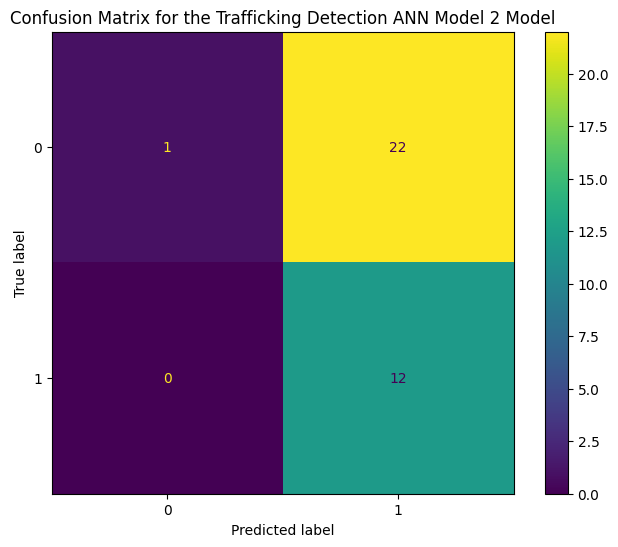

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Trafficking Detection ANN Model 2 Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

# **Model 3** :Add Layers and **Tanh** Activation Function

---

In [105]:
model_3 = nn.Sequential(
    nn.Linear(in_features=X.shape[1], out_features=10),
    nn.Linear(in_features=10, out_features=25) ,
    nn.Linear(in_features=25, out_features=12) ,
    nn.Linear(in_features=12, out_features=1),
    nn.Tanh(),
).to(device)
model_3

Sequential(
  (0): Linear(in_features=1411, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=25, bias=True)
  (2): Linear(in_features=25, out_features=12, bias=True)
  (3): Linear(in_features=12, out_features=1, bias=True)
  (4): Tanh()
)

In [106]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.2)

# Model  3 Training and Validation

In [107]:
torch.manual_seed(42)

epochs = 50 # Train


#initial for Plotting
y_loss_train = []
y_loss_val = []
y_acc_train = []
y_acc_val = []

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    # Capture for Plotting
    y_loss_train.append(loss.item())
    y_acc_train.append(acc)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss_3 = loss_fn(test_logits,
                            y_test)
        test_acc_3= accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        ### Test Acccuracy
        y_loss_val.append(test_loss_3.item())
        y_acc_val.append(test_acc_3)

    # Print out what's happening every 10 epochs
    if epoch % 2 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss_3:.5f}, Test acc: {test_acc_3:.2f}%")

Epoch: 0 | Loss: 0.68820, Accuracy: 54.68% | Test loss: 0.74303, Test acc: 34.29%
Epoch: 2 | Loss: 0.69462, Accuracy: 53.96% | Test loss: 0.73080, Test acc: 37.14%
Epoch: 4 | Loss: 0.69081, Accuracy: 53.96% | Test loss: 0.72086, Test acc: 42.86%
Epoch: 6 | Loss: 0.68654, Accuracy: 56.12% | Test loss: 0.71204, Test acc: 42.86%
Epoch: 8 | Loss: 0.68144, Accuracy: 56.12% | Test loss: 0.70377, Test acc: 45.71%
Epoch: 10 | Loss: 0.67517, Accuracy: 64.75% | Test loss: 0.69571, Test acc: 54.29%
Epoch: 12 | Loss: 0.66742, Accuracy: 66.91% | Test loss: 0.68751, Test acc: 65.71%
Epoch: 14 | Loss: 0.65794, Accuracy: 71.94% | Test loss: 0.67881, Test acc: 62.86%
Epoch: 16 | Loss: 0.64660, Accuracy: 74.10% | Test loss: 0.66954, Test acc: 65.71%
Epoch: 18 | Loss: 0.63342, Accuracy: 76.26% | Test loss: 0.66002, Test acc: 65.71%
Epoch: 20 | Loss: 0.61863, Accuracy: 76.98% | Test loss: 0.65083, Test acc: 62.86%
Epoch: 22 | Loss: 0.60264, Accuracy: 77.70% | Test loss: 0.64268, Test acc: 62.86%
Epoch: 24

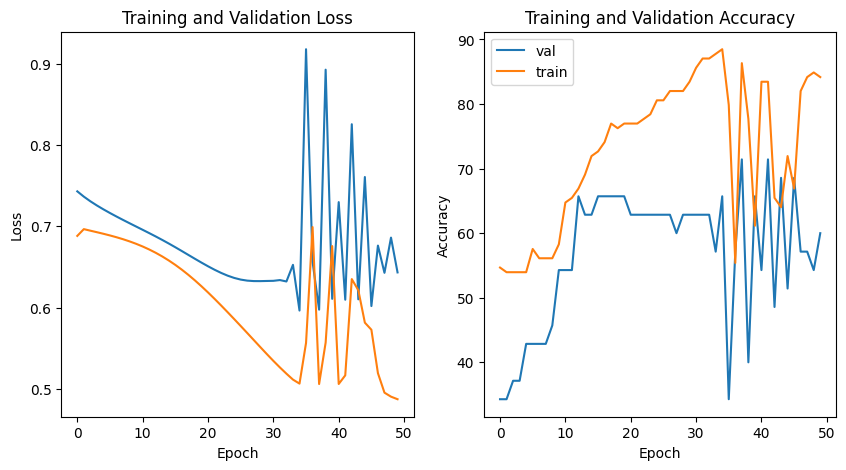

In [108]:
draw_curve(y_loss_val,y_loss_train,y_acc_val,y_acc_train)

In [109]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 1., 0., 1., 0., 0., 1., 1., 0., 0.]),
 tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]))

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Confusion Matrix: Test Data")
conf_matrix=metrics.confusion_matrix(y_test, y_preds)
print(metrics.confusion_matrix(y_test, y_preds))

Confusion Matrix: Test Data
[[12 11]
 [ 3  9]]


In [111]:
#classification report -
print("Classification Report:")
print(metrics.classification_report(y_test, y_preds, target_names=['0', '1']))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.52      0.63        23
           1       0.45      0.75      0.56        12

    accuracy                           0.60        35
   macro avg       0.62      0.64      0.60        35
weighted avg       0.68      0.60      0.61        35



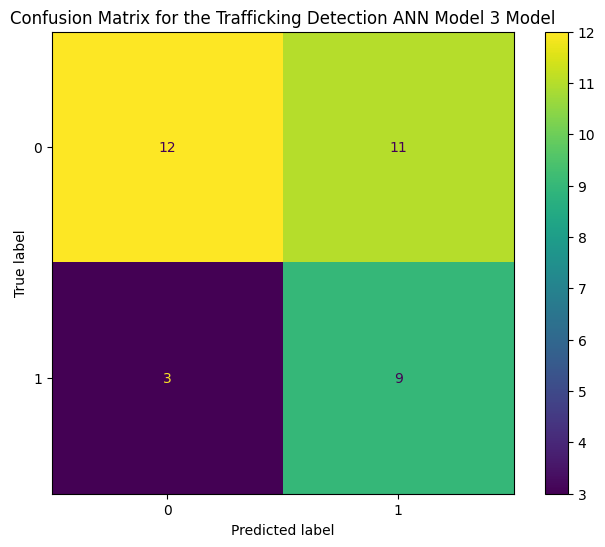

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Trafficking Detection ANN Model 3 Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);